In [ ]:
%matplotlib inline


Labelling connected components of an image
===========================================

This example shows how to label connected components of a binary image, using
the dedicated skimage.measure.label function.



labels [[ 1  1  1 ...  6  6  6]
 [ 1  1  1 ...  6  6  6]
 [ 1  1  1 ...  6  6  6]
 ...
 [27 27 27 ... 25 25 25]
 [27 27 27 ... 25 25 25]
 [ 0  0 27 ... 25 25 25]]
   area  bbox-0  bbox-1  bbox-2  bbox-3   perimeter  convex_area  bbox_area  \
0   988       0       0      63      27  164.426407         1236       1701   
1  1154       0      44      35     108  180.811183         1387       2240   
2   189       0     101      13     118   50.142136          196        221   
3  7100       0     117     182     256  799.251875        13752      25298   
4   437       0     163      16     201  104.426407          528        608   

   major_axis_length  minor_axis_length  eccentricity  compactness  \
0          68.164973          24.170084      0.935025    27.364416   
1          65.922568          25.730728      0.920680    28.329882   
2          17.701198          13.854626      0.622406    13.302824   
3         231.217395          78.367183      0.940811    89.972332   
4          4

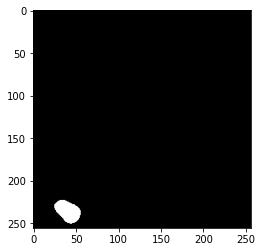

In [24]:
# from skimage import measure
from skimage import filters
from skimage.measure import label, regionprops, regionprops_table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
print("labels {}".format(all_labels))
blobs_labels = measure.label(blobs, background=0)
properties =['area','bbox','perimeter','convex_area','bbox_area',
             'major_axis_length', 'minor_axis_length',
             'eccentricity']
df = pd.DataFrame(regionprops_table(blobs_labels, properties = properties))

df["compactness"]= df["perimeter"]**2/df["area"]
df["rectangularity"] = df["area"]/df["bbox_area"]

print(df.head())

best= np.argmax(df['rectangularity'])

blobs_labels[blobs_labels!=best]=0

plt.imshow(blobs_labels,cmap="gray")
plt.show()